In [21]:
%matplotlib inline 

import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
import os
from scipy.stats import norm
import time
import xarray as xr

# import dask.array as da
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import seaborn as sns
sns.set_style('dark')
sns.set_context("talk", font_scale=1.8) #[poster, paper, talk, notebook]

import matplotlib.patheffects as PathEffects
import matplotlib.dates as mdates
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color'] #added from snow class

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [63]:
fname = '/Users/megmason/research/sierra/data/compiled_SUPERsnow_3km_subregion.nc'

ds = xr.open_dataset(fname, chunks={'time':1,'x':1000,'y':1000})
ds['snow'] = ds.snow / 10
ds.attrs['units'] = 'cm'
ds=ds.astype(np.int16, copy=False)
ds.close()
d = ds.isel(time=31)
print(d)

<xarray.Dataset>
Dimensions:  (x: 1000, y: 1000)
Coordinates:
    dem      (y, x) float32 dask.array<shape=(1000, 1000), chunksize=(1000, 1000)>
  * y        (y) float32 4221327.0 4221324.0 4221321.0 ... 4218333.0 4218330.0
    time     datetime64[ns] 2016-04-26
    mask     (y, x) uint8 dask.array<shape=(1000, 1000), chunksize=(1000, 1000)>
    veg      (y, x) float32 dask.array<shape=(1000, 1000), chunksize=(1000, 1000)>
  * x        (x) float32 279207.0 279210.0 279213.0 ... 282201.0 282204.0
Data variables:
    snow     (y, x) int16 dask.array<shape=(1000, 1000), chunksize=(1000, 1000)>
Attributes:
    units:    cm


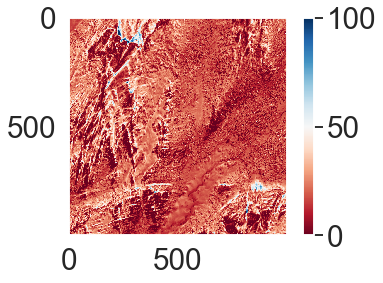

In [18]:
plt.imshow(d.snow, cmap='RdBu', vmax=100)
plt.colorbar()

In [64]:
# d = d.isel(x=slice(500,700), y=slice(700,900))
# d = d.isel(x=slice(500,503), y=slice(700,703))
d = d.sel(x=slice(280707.0,280737.0), y=slice(4219227.0,4219197.0))

In [61]:
d.coords

Coordinates:
    dem      (y, x) float32 dask.array<shape=(3, 3), chunksize=(3, 3)>
  * y        (y) float32 4219227.0 4219224.0 4219221.0
    time     datetime64[ns] 2016-04-26
    mask     (y, x) uint8 dask.array<shape=(3, 3), chunksize=(3, 3)>
    veg      (y, x) float32 dask.array<shape=(3, 3), chunksize=(3, 3)>
  * x        (x) float32 280707.0 280710.0 280713.0

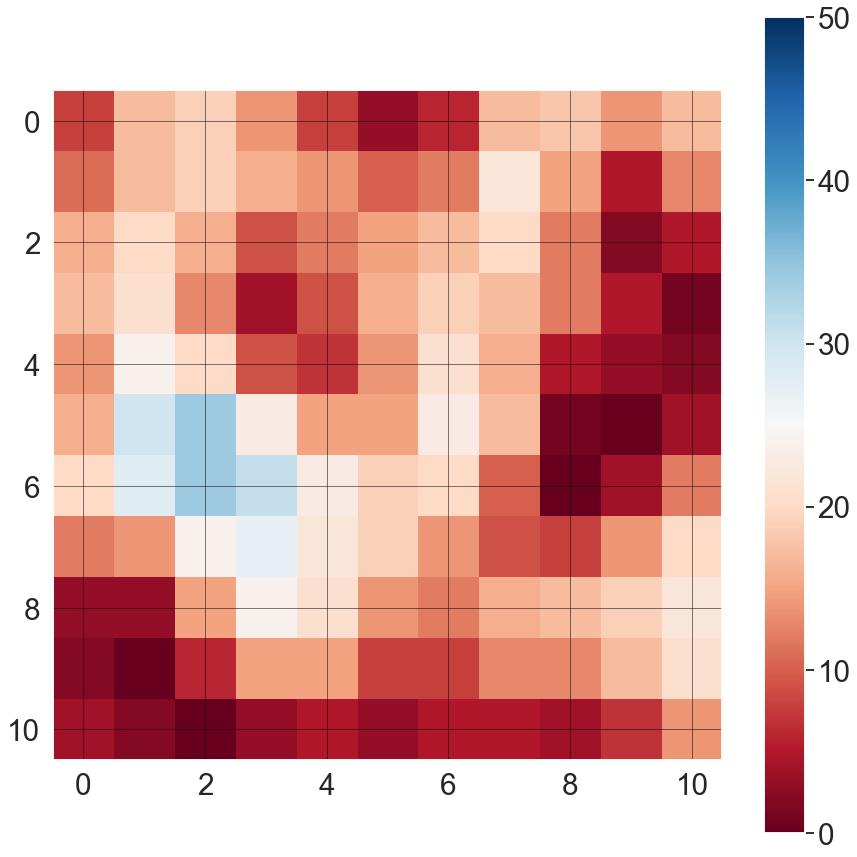

In [67]:
fig=plt.figure(figsize=(15,15))
plt.imshow(d.snow, cmap='RdBu', vmax=50)
plt.colorbar()

plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(mpl.ticker.MultipleLocator(30))
plt.gca().yaxis.set_minor_locator(mpl.ticker.MultipleLocator(30))
plt.grid(which="both", linewidth=0.5,color="k")
plt.tick_params(which="minor", length=0)